In [2]:
#1  Citește fișierul CSV

import pandas as pd

data = pd.read_csv("document.csv")  # Asigură-te că specifici corect calea fișierului

# Conversia coloanei de timp
data['timestamp'] = pd.to_datetime(data['timestamp'])

#Numărul de utilizatori în grupurile A și B

group_counts = data['test_group'].value_counts()
num_users_a = group_counts.get('a', 0)
num_users_b = group_counts.get('b', 0)

print(f"Număr utilizatori Grup A: {num_users_a}")
print(f"Număr utilizatori Grup B: {num_users_b}")

#Numărul de conversii în grupurile A și B

conversion_counts = data.groupby('test_group')['conversion'].sum()
num_conversions_a = conversion_counts.get('a', 0)
num_conversions_b = conversion_counts.get('b', 0)

print(f"Număr conversii Grup A: {num_conversions_a}")
print(f"Număr conversii Grup B: {num_conversions_b}")

#Rata de conversie în grupurile A și B


conversion_rates = (conversion_counts / group_counts) * 100
rate_conversion_a = conversion_rates.get('a', 0)
rate_conversion_b = conversion_rates.get('b', 0)

print(f"Rată de conversie Grup A: {rate_conversion_a:.2f}%")
print(f"Rată de conversie Grup B: {rate_conversion_b:.2f}%")

# Data de început, data de sfârșit și durata testului

test_start = data['timestamp'].min()
test_end = data['timestamp'].max()
test_duration = (test_end - test_start).days

print(f"Data de început a testului: {test_start}")
print(f"Data de sfârșit a testului: {test_end}")
print(f"Durata testului: {test_duration} zile")


Număr utilizatori Grup A: 10013
Număr utilizatori Grup B: 9985
Număr conversii Grup A: 611
Număr conversii Grup B: 889
Rată de conversie Grup A: 6.10%
Rată de conversie Grup B: 8.90%
Data de început a testului: 2023-07-03 01:42:34.033708
Data de sfârșit a testului: 2023-07-25 01:41:19.152664
Durata testului: 21 zile


In [3]:
#2 Alege un criteriu statistic pentru a testa ipotezele și calcula statistica și p-value. Verifică dacă putem respinge ipoteza nulă. Nu uita să precizezi ce criteriu folosești.

from scipy.stats import norm

# Calcul manual al z-statistic și p-value
p_a = num_conversions_a / num_users_a
p_b = num_conversions_b / num_users_b
p_combined = (num_conversions_a + num_conversions_b) / (num_users_a + num_users_b)

z_stat = (p_a - p_b) / ((p_combined * (1 - p_combined) * (1 / num_users_a + 1 / num_users_b)) ** 0.5)
p_value = 2 * norm.sf(abs(z_stat))

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")



Z-statistic: -7.52
P-value: 0.0000


/var/folders/w1/td06v9y93gdb0c71vymxq9nh0000gn/T/ipykernel_2295/93512532.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/w1/td06v9y93gdb0c71vymxq9nh0000gn/T/ipykernel_2295/93512532.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


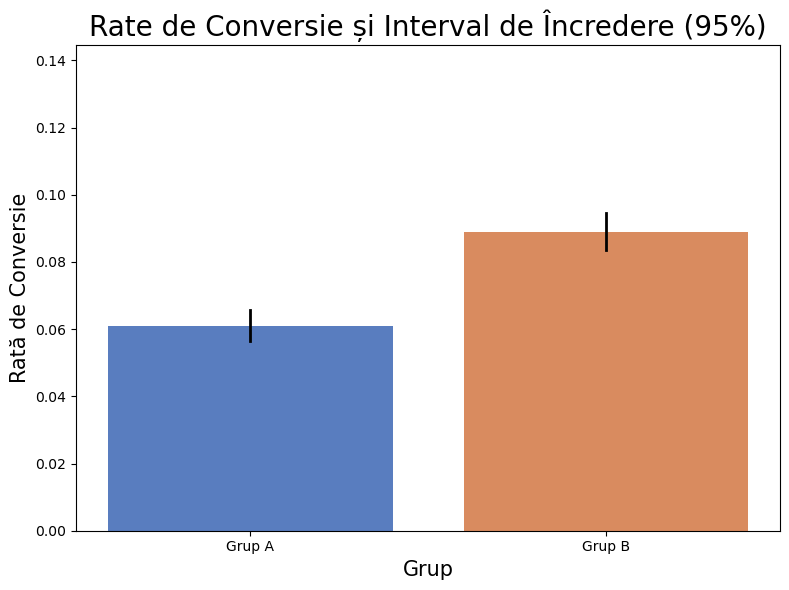

  test_group  num_users  num_conversions  conversion_rate  ci_lower  ci_upper
0          a      10013              611         0.061021  0.056332  0.065709
1          b       9985              889         0.089034  0.083448  0.094620


In [ ]:
#3


import matplotlib.pyplot as plt
import seaborn as sns


# Calcularea ratelor de conversie pentru fiecare grup
summary = data.groupby('test_group').agg(
    num_users=('user_id', 'count'),
    num_conversions=('conversion', 'sum')
)
summary['conversion_rate'] = summary['num_conversions'] / summary['num_users']

# Calculul intervalelor de încredere (95%)
z = norm.ppf(0.975)  # 95% interval de încredere
summary['ci_lower'] = summary['conversion_rate'] - z * (
    (summary['conversion_rate'] * (1 - summary['conversion_rate']) / summary['num_users']) ** 0.5
)
summary['ci_upper'] = summary['conversion_rate'] + z * (
    (summary['conversion_rate'] * (1 - summary['conversion_rate']) / summary['num_users']) ** 0.5
)

# Pregătirea datelor pentru vizualizare
summary = summary.reset_index()

# Creează vizualizarea
plt.figure(figsize=(8, 6))
sns.barplot(
    data=summary,
    x='test_group',
    y='conversion_rate',
    ci=None,
    palette="muted"
)
for index, row in summary.iterrows():
    plt.plot(
        [index, index],
        [row['ci_lower'], row['ci_upper']],
        color='black',
        linewidth=2
    )

plt.title('Rate de Conversie și Interval de Încredere (95%)', fontsize=20)
plt.ylabel('Rată de Conversie', fontsize=15)
plt.xlabel('Grup', fontsize=15)
plt.xticks([0, 1], ['Grup A', 'Grup B'], fontsize=10)
plt.ylim(0, summary['ci_upper'].max() + 0.05)
plt.tight_layout()

# Afișarea graficului
plt.show()

# Afișează sumarul datelor pentru concluzii
print(summary)


In [ ]:
#4

# Grupul B are o rată de conversie mai mare comparativ cu Grupul A, 
# sugerând că menționarea unei reduceri poate avea un impact pozitiv asupra conversiei utilizatorilor.
# Graficul sugerează că rata de conversie a Grupului B este mai mare decât a Grupului A.
# Intervalele de încredere pentru Grupul A și Grupul B nu se suprapun, 
# ceea ce indică o diferență semnificativă între cele două grupuri (dacă testul confirmă acest lucru).
# Evoluția ratei de conversie în timp ar putea confirma un efect consistent al intervenției (reducerea) 
# asupra comportamentului utilizatorilor.
# Dacă datele indică o creștere constantă a conversiilor în Grupul B, acest lucru poate sprijini 
# decizia de implementare a reducerii.



# Recomandare:

# Pe baza analizei, dacă testul de semnificație confirmă diferența statistică, 
# recomandăm implementarea ofertei de 50% reducere în cadrul aplicației. 
# Aceasta ar putea îmbunătăți rata de conversie generală, atrăgând mai mulți utilizatori în planul premium.
# Dacă diferența nu este semnificativă, ar trebui explorate alte variante de oferte sau alte metode de promovare 
# a abonamentului.